In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [2]:
#download the cifar 100

(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')

#normalize the pixel values: 0 - 1
train_images = train_images / 255.0

test_images = test_images / 255.0

169001437/169001437 [==============================] - 4s 0us/step


In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

In [5]:
train_labels.shape

(50000, 1)

In [6]:
test_labels.shape

(10000, 1)

In [7]:
train_images[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.76470588, 0.80392157, 0.75686275],
        [0.83137255, 0.87843137, 0.8       ],
        [0.71372549, 0.76078431, 0.65490196]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.69019608, 0.58823529],
        [0.63137255, 0.65882353, 0.50980392],
        [0.57254902, 0.60392157, 0.44313725]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.74117647, 0.78039216, 0.6627451 ],
        [0.65098039, 0.69803922, 0.50980392],
        [0.4745098 , 0.52156863, 0.34117647]],

       ...,

       [[0.58039216, 0.7254902 , 0.30980392],
        [0.55686275, 0.71372549, 0.22352941],
        [0.54901961, 0

In [8]:
#create a list of class names

class_names = ['aquatic mammals	','fish','flower','food container','fruits and vegetable','electrical devices','household furniture',
               'insects','large carnivores','large man made outdoor things','large natural outdoor scenes','large omnivore and herbivore',
               'medium sized animals','non insect invertebrates','people','reptiles','small mammals','trees','vehicle 1','vehicle 2']


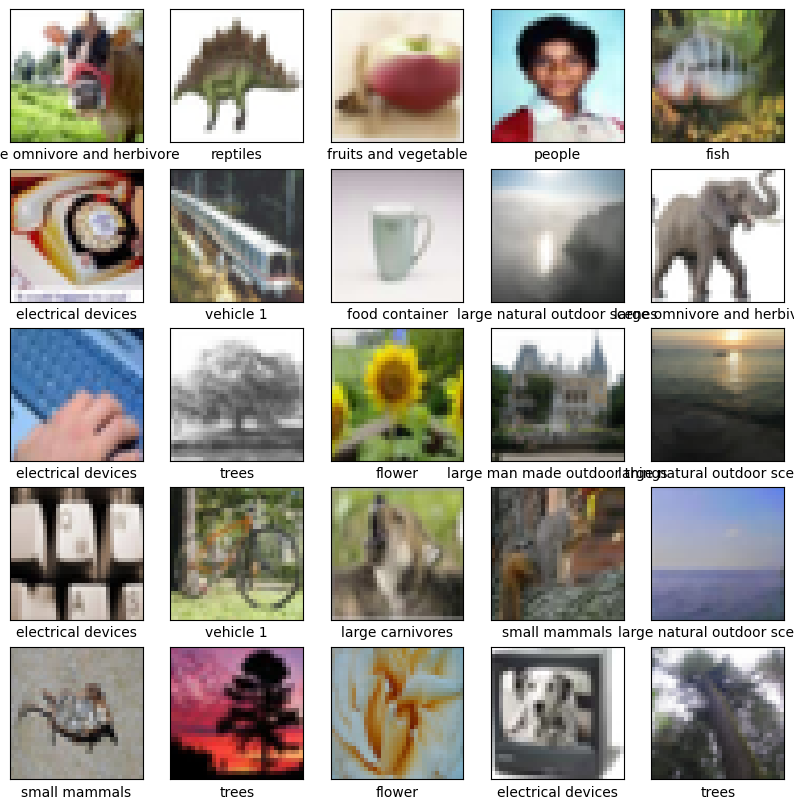

In [9]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

arch-1

In [10]:
#arch-1
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [11]:
#without overfitting
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(20))

In [12]:
model.compile(optimizer='adam',
               loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 4ms/step - loss: 2.4259 - accuracy: 0.2463
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0554 - accuracy: 0.3639
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8874 - accuracy: 0.4107
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7736 - accuracy: 0.4452
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6818 - accuracy: 0.4729
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6123 - accuracy: 0.4927
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5469 - accuracy: 0.5129
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4887 - accuracy: 0.5314
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4367 - accuracy: 0.5441
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.38

In [14]:
#Accuracy on test data :
test_loss, test_accu = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.6969 - accuracy: 0.4793


In [15]:
#Accuraccy on training data:
train_loss, train_accu = model.evaluate(train_images, train_labels)

1563/1563 [==============================] - 5s 3ms/step - loss: 1.2655 - accuracy: 0.6003


In [16]:
pred = model.predict(test_images)
pred[0]

313/313 [==============================] - 1s 2ms/step


array([ 1.8391694 ,  0.21717843, -1.9917601 , -3.3339615 , -4.462681  ,
       -1.0049031 , -3.7389333 ,  0.85705584, -1.654365  , -0.2434611 ,
        1.0787723 , -1.2514966 , -2.3580828 ,  1.5616461 , -2.0195591 ,
       -0.6065341 , -1.2563541 ,  0.4319564 , -0.95307606,  0.84366846],
      dtype=float32)

In [17]:
import numpy as np
np.argmax(pred[0])

0

In [18]:
test_labels[0]

array([10])

Arch-2

In [19]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))

model1.add(layers.Conv2D(128,(3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))

model1.add(layers.Conv2D(128, (3,3), activation='relu'))
model1.add(layers.Conv2D(256, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(256,activation='relu'))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(20))

In [20]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 128)        

In [21]:
model1.compile(optimizer='adam',
               loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [22]:
history1 = model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 6ms/step - loss: 2.5681 - accuracy: 0.1937
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1543 - accuracy: 0.3256
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9011 - accuracy: 0.4042
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7228 - accuracy: 0.4554
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5877 - accuracy: 0.4960
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4726 - accuracy: 0.5329
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3690 - accuracy: 0.5623
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2758 - accuracy: 0.5882
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1946 - accuracy: 0.6125
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.10

In [23]:
#Testing accuracy:
test_loss, test_accu = model1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.6554 - accuracy: 0.5112


In [24]:
#Training Accuracy
train_loss, train_accu = model1.evaluate(train_images, train_labels)

1563/1563 [==============================] - 6s 4ms/step - loss: 0.9413 - accuracy: 0.6974


In [25]:
pred1 = model.predict(test_images)
pred1[0]

313/313 [==============================] - 1s 2ms/step


array([ 1.8391694 ,  0.21717843, -1.9917601 , -3.3339615 , -4.462681  ,
       -1.0049031 , -3.7389333 ,  0.85705584, -1.654365  , -0.2434611 ,
        1.0787723 , -1.2514966 , -2.3580828 ,  1.5616461 , -2.0195591 ,
       -0.6065341 , -1.2563541 ,  0.4319564 , -0.95307606,  0.84366846],
      dtype=float32)

In [26]:
np.argmax(pred[0])

0

In [27]:
test_labels[0]

array([10])

Tunning

In [28]:
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.1 MB/s eta 0:00:00


In [29]:
from keras import layers
from keras.layers import BatchNormalization
from keras import regularizers

def model_builder(hp):
  model = keras.Sequential()
  #adding input layer
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(keras.layers.Flatten())

  #tune the no of units in the first Dense Layer
  #choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512)
  model.add(keras.layers.Dense(units=hp_units, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  #model.add(BatchNormalization())   #updated
  model.add(keras.layers.Dropout(0.5))  #updated

  model.add(keras.layers.Dense(20)) #output layer

  #tune the learning rate for the optimizer
  #choose an ptimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [30]:
tuner = kt.Hyperband(model_builder,objective='val_accuracy',
                   max_epochs=10,
                   factor=4,overwrite=True,
                   directory='my_dir',
                   project_name='intro_to_kt')

In [31]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [32]:
tuner.search(train_images,train_labels,epochs=50,validation_split=0.2,callbacks=[stop_early])

In [33]:
#Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hps.get('units'))
print(best_hps.get('learning_rate'))

441
0.0001


In [34]:
model = tuner.hypermodel.build(best_hps)
newmodel = model.fit(train_images,train_labels, epochs=50, validation_split=0.2)

val_acc_per_epoch = newmodel.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch))+1
print('Best epoch: %d'%(best_epoch,))

Epoch 1/50
1250/1250 [==============================] - 13s 9ms/step - loss: 3.6125 - accuracy: 0.1649 - val_loss: 2.7007 - val_accuracy: 0.2181
Epoch 2/50
1250/1250 [==============================] - 18s 14ms/step - loss: 2.6939 - accuracy: 0.2114 - val_loss: 2.5964 - val_accuracy: 0.2619
Epoch 3/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.6375 - accuracy: 0.2277 - val_loss: 2.5501 - val_accuracy: 0.2666
Epoch 4/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.6030 - accuracy: 0.2387 - val_loss: 2.5217 - val_accuracy: 0.2855
Epoch 5/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.5723 - accuracy: 0.2503 - val_loss: 2.4907 - val_accuracy: 0.2876
Epoch 6/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.5488 - accuracy: 0.2561 - val_loss: 2.4809 - val_accuracy: 0.2902
Epoch 7/50
1250/1250 [==============================] - 8s 7ms/step - loss: 2.5305 - accuracy: 0.2666 - val_loss: 2.4491 - val_accura

In [36]:
hypermodel = tuner.hypermodel.build(best_hps)
history2 = hypermodel.fit(train_images, train_labels, epochs=best_epoch, validation_split=0.2, validation_data=(test_images,test_labels))

Epoch 1/46
1563/1563 [==============================] - 18s 11ms/step - loss: 3.4383 - accuracy: 0.1626 - val_loss: 2.6752 - val_accuracy: 0.2294
Epoch 2/46
1563/1563 [==============================] - 12s 8ms/step - loss: 2.6862 - accuracy: 0.2071 - val_loss: 2.5883 - val_accuracy: 0.2571
Epoch 3/46
1563/1563 [==============================] - 13s 9ms/step - loss: 2.6297 - accuracy: 0.2231 - val_loss: 2.5575 - val_accuracy: 0.2662
Epoch 4/46
1563/1563 [==============================] - 12s 8ms/step - loss: 2.5899 - accuracy: 0.2352 - val_loss: 2.5110 - val_accuracy: 0.2694
Epoch 5/46
1563/1563 [==============================] - 12s 7ms/step - loss: 2.5626 - accuracy: 0.2427 - val_loss: 2.4840 - val_accuracy: 0.2740
Epoch 6/46
1563/1563 [==============================] - 11s 7ms/step - loss: 2.5419 - accuracy: 0.2504 - val_loss: 2.4560 - val_accuracy: 0.2837
Epoch 7/46
1563/1563 [==============================] - 11s 7ms/step - loss: 2.5224 - accuracy: 0.2585 - val_loss: 2.4378 - val_a

In [37]:
eval_result = hypermodel.evaluate(test_images,test_labels)
print('[test_loss, test_accuracy]:',eval_result)

313/313 [==============================] - 1s 3ms/step - loss: 2.2228 - accuracy: 0.3735
[test_loss, test_accuracy]: [2.2227938175201416, 0.3734999895095825]


In [42]:
pred2 = hypermodel.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [43]:
np.argmax(pred2[0])

9

In [44]:
test_labels[0]

array([10])

In [45]:
pred[10]

array([-1.296439  , -0.27897114, -1.681537  ,  0.06398245, -3.0125124 ,
        2.0151088 ,  2.3769085 , -5.608411  , -2.6921113 ,  2.929484  ,
        0.8231349 ,  0.13721989, -1.6114235 , -3.411766  , -0.6171796 ,
       -3.183984  , -1.3315902 , -0.97486526, -2.6935081 , -0.1820412 ],
      dtype=float32)